## Lecture 4. Softmax Classification
  (1) Fashion MNIST 데이터를 이용하여 softmax classification을 수행한다.\
  (2) 학습데이터에 대한 epoch에 따른 cross-entropy loss와 accuracy 그래프를 그린다.\
  (3) 테스트 데이터에 대한 인식률을 그린다,

Step 0. 설정



In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn.functional as F

import random
import numpy as np

In [ ]:
L_R = 1e-3
BATCH_SIZE = 100
EPOCHS = 10

if torch.cuda.is_available()==True:
  DEVICE='cuda'
else:
  DEVICE='cpu'

random.seed(011011)
torch.manual_seed(011011)
if DEVICE == 'cuda':
  torch.cuda.manual_seed_all(011011)


print(DEVICE)

cuda


 Step 1. Data

In [ ]:
train_data = datasets.FashionMNIST(
    root="data", 
    train=True, 
    download=True, 
    transform=ToTensor()
    )

test_data= datasets.FashionMNIST(
    root="data", 
    train=False, 
    download=True, 
    transform=ToTensor()
    )

In [ ]:
train_dataloader =DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader =DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print('train_data :', train_data)
print('test_data :', test_data)
torch.Tensor.size(train_data.data)

train_data : Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
test_data : Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


torch.Size([60000, 28, 28])

Step 2. Softmax Classification Model

In [ ]:
class SCM(nn.Module):
#nn.Module을 서브클래스로 두면서 NN을 정의하고, __init__에서 NN layers을 초기화한다.
  def __init__(self):
	#init에서는 모델을 초기화하고, 모델 구조 정의가 이루어진다.
    super(SCM, self).__init__()
    self.scm = nn.Sequential(
        torch.nn.Linear(28*28,10),
                             )
  def forward(self, x):
	#forward에서는 실행 정의가 이루어진다. 즉 NN의 결과를 계산한다.
    x=x.view(-1,28 * 28)
    return self.scm(x)

model=SCM().to(DEVICE)

Step 3 and 4. Loss and Optimization

In [ ]:
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=L_R)

Training.

In [ ]:
def train_1epoch(dataloader, model, cost_fn, optimizer):
  size=len(dataloader.dataset)
  num_batches=len(dataloader)

  train_loss, correct = 0,0

  for batchs, (X,Y) in enumerate(dataloader):
    X=X.view(-1,28*28).to(DEVICE)
    Y=Y.to(DEVICE)


    Y_hat=model(X)
    cost=cost_fn(Y_hat, Y)
    train_loss+=cost.item()
    correct+= (Y_hat.argmax(1) == Y).type(torch.float).sum().item()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  train_loss /= num_batches
  accuracy = correct / size
  print(f"Train - Avg loss: {train_loss:>8f},  Accuracy: {(100*accuracy):>0.1f}%", end = "  ")
  return train_loss, accuracy

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.view(-1, 28 * 28).to(DEVICE)
            y = y.to(DEVICE)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test - Avg loss: {test_loss:>8f}  Accuracy: {(100*correct):>0.1f}%")

    return test_loss, correct


In [ ]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for t in range(EPOCHS):
    print(f"Epoch {t+1} :", end= "  ")
    loss, acc = train_1epoch(train_dataloader, model, cost_fn, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)

    loss_t, acc_t = test_loop(test_dataloader, model, cost_fn)
    test_loss.append(loss_t)
    test_acc.append(acc_t)

print("Done!")

Epoch 1 :  

KeyboardInterrupt: ignored

In [ ]:
print(train_acc)

[0.5069666666666667, 0.6581333333333333, 0.6730333333333334, 0.6857166666666666, 0.7002, 0.7139, 0.7260666666666666, 0.7352333333333333, 0.7429, 0.7494166666666666]


Plot

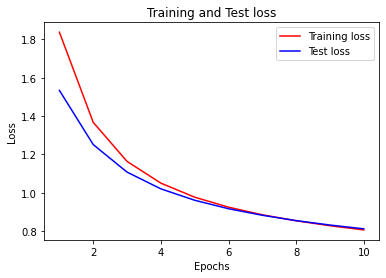

In [ ]:
epochs=np.arange(1,EPOCHS+1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

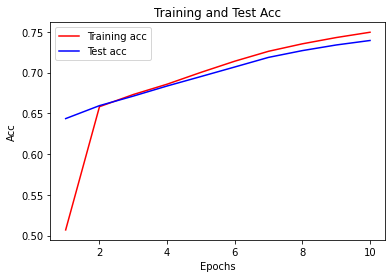

In [ ]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()